In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

### IMPORT DATASET

In [3]:
import chardet

# Read the file as binary and detect encoding
with open(r"C:\Users\Ezhilarasi\OneDrive\Desktop\predict audience_rating.csv", 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])


Windows-1252


In [4]:
df = pd.read_csv(r"C:\Users\Ezhilarasi\OneDrive\Desktop\predict audience_rating.csv", encoding=result['encoding'])

In [7]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


In [11]:
df.shape

(16638, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime_in_minutes,16483.0,102.391494,25.028011,1.0,90.0,99.0,111.0,2000.0
tomatometer_rating,16638.0,60.466522,28.587230,0.0,38.0,66.0,86.0,100.0
tomatometer_count,16638.0,56.607104,66.383800,5.0,12.0,28.0,76.0,497.0
audience_rating,16386.0,60.470829,20.462368,0.0,45.0,62.0,77.0,100.0


#### NULL VALUE

In [17]:
df.isnull().sum().sort_values(ascending=False)

critics_consensus     8329
writers               1349
in_theaters_date       815
studio_name            416
cast                   284
audience_rating        252
runtime_in_minutes     155
directors              114
movie_info              24
genre                   17
on_streaming_date        2
movie_title              0
rating                   0
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
dtype: int64

#### NULL VALUE IN PERCENTAGE

In [19]:
(df.isnull().sum().sort_values(ascending=False)/len(df)*100)

critics_consensus     50.060103
writers                8.107946
in_theaters_date       4.898425
studio_name            2.500301
cast                   1.706936
audience_rating        1.514605
runtime_in_minutes     0.931602
directors              0.685179
movie_info             0.144248
genre                  0.102176
on_streaming_date      0.012021
movie_title            0.000000
rating                 0.000000
tomatometer_status     0.000000
tomatometer_rating     0.000000
tomatometer_count      0.000000
dtype: float64

### DATA VISUALISATION IN NULL VALUE

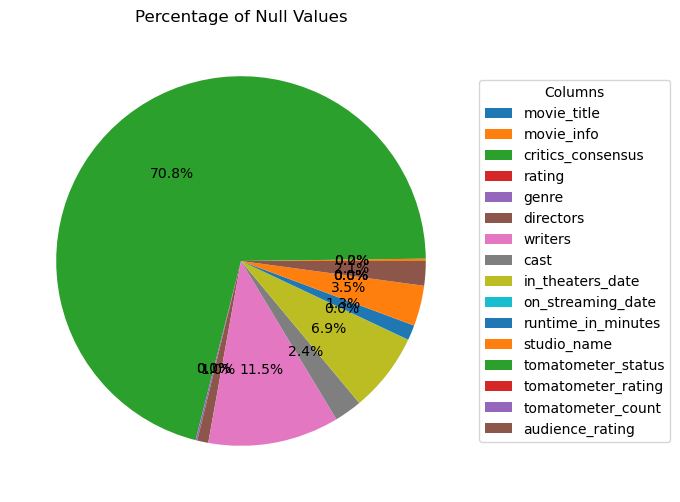

In [21]:
import matplotlib.pyplot as plt

# Plot the pie chart
ax = df.isnull().sum().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(7, 6), 
    labels=None 
)

# Add a legend
plt.legend(labels=df.isnull().sum().index, title="Columns", loc="center left", bbox_to_anchor=(1, 0.5))

# Add a title
plt.title("Percentage of Null Values")
plt.ylabel("") 

plt.show()


### Drop The columl in critics_consensus

In [23]:
df.drop('critics_consensus',axis=1,inplace=True)

In [25]:
df.dropna(inplace=True, axis=0)

In [27]:
df.shape

(14090, 15)

### No Duplicated Data

In [29]:
df.duplicated().sum()

0

### Exploratory Data Analysis

In [33]:
df.select_dtypes('object').nunique()

movie_title           13667
movie_info            14090
rating                    8
genre                   979
directors              6877
writers               11157
cast                  14087
in_theaters_date       5198
on_streaming_date      2093
studio_name            2386
tomatometer_status        3
dtype: int64

In [35]:
#Number of directors in each movie

df['num_directors']=df['directors'].apply(lambda x:len(x.split(',')))

#Movie with the highest number of directors

df[df['num_directors']==df['num_directors'].max()]

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors
10976,Paris Je T'aime,Twenty acclaimed filmmakers from around the wo...,R,"Art House & International, Drama, Romance","Christoffer Boe, Olivier Assayas, Fr?©d?©ric A...","Bruno Podalyd?®s, Paul Mayeda Berges, Gurinder...","Juliette Binoche, Steve Buscemi, Sergio Castel...",04-05-2007,13-11-2007,120.0,First Look Pictures,Certified Fresh,87,112,84.0,22


In [37]:
#Number of cast in each movie

df['num_cast']=df['cast'].apply(lambda x:len(x.split(',')))

#Movie in the highest number of actors

df[df['num_cast']==df['num_cast'].max()]

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_cast
912,Malcolm X,Writer-director Spike Lee's epic portrayal of ...,PG-13,Drama,Spike Lee,"Spike Lee, Arnold Perl","Denzel Washington, Angela Bassett, Al Freeman ...",18-11-1992,18-01-2000,201.0,Warner Bros.,Certified Fresh,88,57,91.0,1,306


In [37]:
#Number of writers in each movie

df['num_writers']=df['writers'].apply(lambda x:len(x.split(',')))

#Movie with the highest number of writers

df[df['num_writers']==df['num_writers'].max()]




,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_cast,num_writers
10976,Paris Je T'aime,Twenty acclaimed filmmakers from around the wo...,R,"Art House & International, Drama, Romance","Christoffer Boe, Olivier Assayas, Fr?©d?©ric A...","Bruno Podalyd?®s, Paul Mayeda Berges, Gurinder...","Juliette Binoche, Steve Buscemi, Sergio Castel...",04-05-2007,13-11-2007,120.0,First Look Pictures,Certified Fresh,87,112,84.0,22,36,24


In [39]:
#Movie with the highest runtime in minutes:

print(f'Movie with the highest runtime in minutes: \n{df[df["runtime_in_minutes"] == df["runtime_in_minutes"].max()][["runtime_in_minutes", "movie_title"]]}')


#Movie with the lowest runtime in minutes:

print(f'Movie with the highest runtime in minutes: \n{df[df["runtime_in_minutes"] == df["runtime_in_minutes"].min()][["runtime_in_minutes", "movie_title"]]}')


Movie with the highest runtime in minutes: 
       runtime_in_minutes   movie_title
13539              2000.0  Terror Tract
Movie with the highest runtime in minutes: 
       runtime_in_minutes                                        movie_title
323                   1.0                                         The Border
1017                  1.0                                       The Prophecy
3039                  1.0   The Barbarian Invasions (Les Invasions barbares)
7019                  1.0  Halloween - The Curse of Michael Myers (Hallow...
7248                  1.0                                 Hellraiser: Deader
7249                  1.0                             Hellraiser: Hellseeker
7250                  1.0                              Hellraiser: Hellworld
11986                 1.0                               Rory O'Shea Was Here


C:\Users\Ezhilarasi\AppData\Local\Temp\ipykernel_21076\1386739359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette=palette, hue=None)  # Explicitly set hue to None


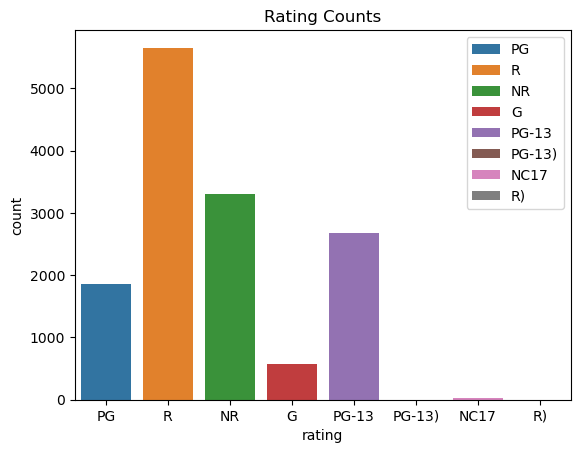

In [41]:
palette = sns.color_palette("tab10", len(df['rating'].value_counts()))  # Ensure the palette length matches the unique values
sns.countplot(data=df, x='rating', palette=palette, hue=None)  # Explicitly set hue to None
plt.title('Rating Counts')
plt.legend(labels=df['rating'].unique(), loc='upper right')  # Add a legend
plt.show()


### INFERANCE
     The bar chart illustrates the distribution of movie ratings. R-rated films are the most prevalent, followed by PG and NR ratings. In contrast, G and NC-17 rated movies are significantly less common. PG-13 movies occupy a middle ground in terms of frequency. This distribution likely reflects audience preferences and industry trends, with a greater demand for mature-themed content compared to strictly family-friendly or extremely adult-oriented films.

tomatometer_status
0    6468
1    4969
2    2653
Name: count, dtype: int64


C:\Users\Ezhilarasi\AppData\Local\Temp\ipykernel_21076\2088850973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tomatometer_status',palette=palette)


Text(0.5, 1.0, 'Number od Fresh, Certified Fresh and Rotten Movies')

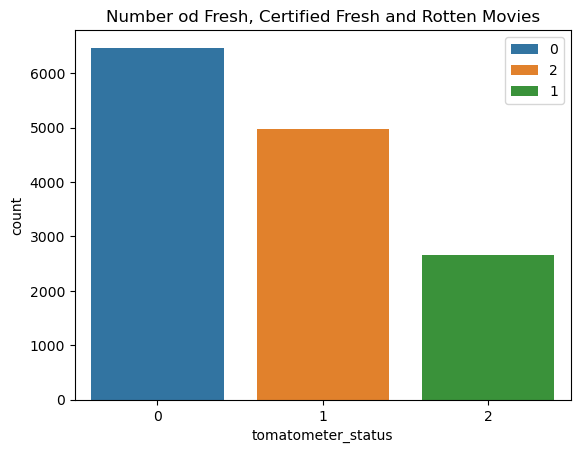

In [45]:
#Number od Fresh, Certified Fresh and Rotten Movies
print(df['tomatometer_status'].value_counts())
palette = sns.color_palette("tab10", len(df['tomatometer_status'].value_counts()))
sns.countplot(data=df, x='tomatometer_status',palette=palette)
plt.legend(labels=df['tomatometer_status'].unique(), loc='upper right')
plt.title('Number od Fresh, Certified Fresh and Rotten Movies')

In [47]:
#Replacing tomatometer_status with numeric values
df['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified Fresh'], [0, 1, 2], inplace=True)

In [49]:
df['tomatometer_status'].value_counts()

tomatometer_status
0    6468
1    4969
2    2653
Name: count, dtype: int64

audience_rating
72.0    277
75.0    271
76.0    248
78.0    248
82.0    244
       ... 
0.0       3
99.0      2
6.0       2
98.0      2
4.0       1
Name: count, Length: 98, dtype: int64


C:\Users\Ezhilarasi\AppData\Local\Temp\ipykernel_21076\1248998850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='audience_rating',palette=palette)
C:\Users\Ezhilarasi\AppData\Local\Temp\ipykernel_21076\1248998850.py:5: UserWarning: The palette list has more values (14090) than needed (98), which may not be intended.
  sns.countplot(data=df, x='audience_rating',palette=palette)


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

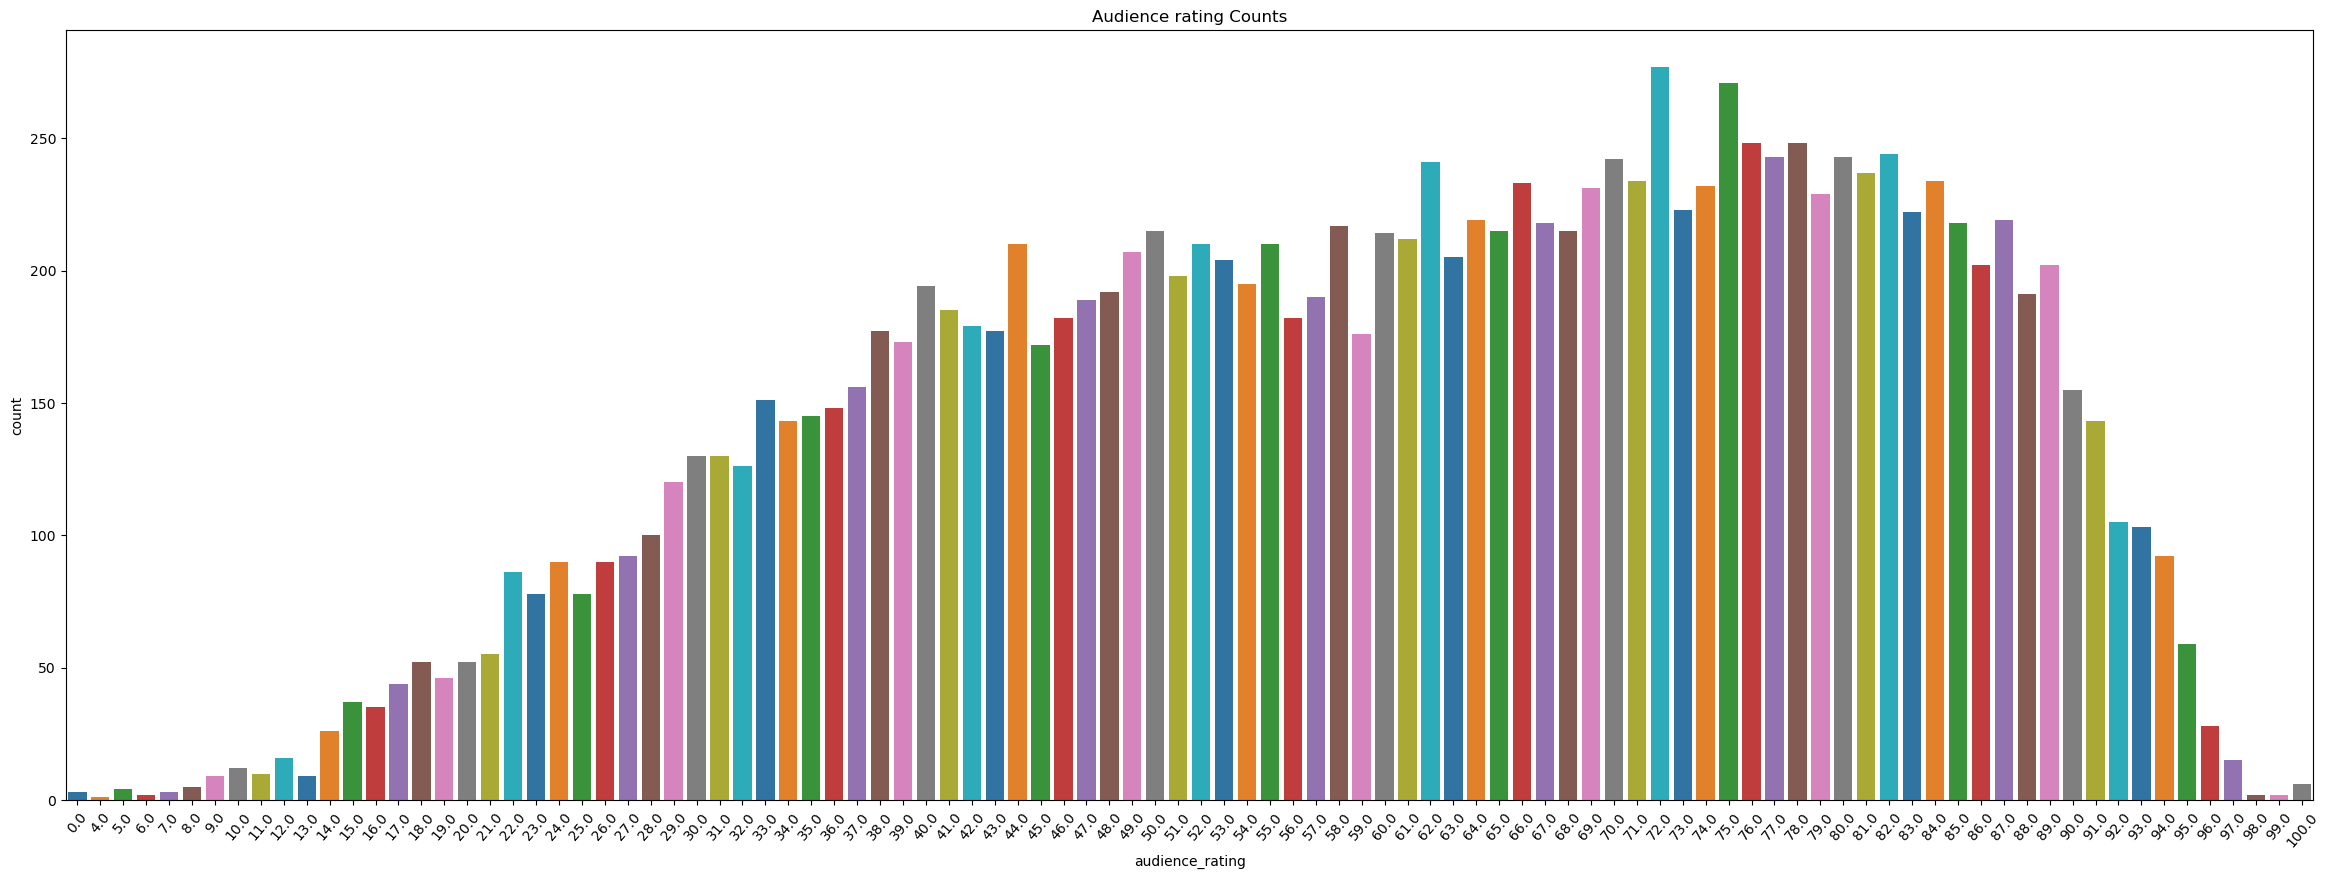

In [51]:
#Audience rating  Counts
print(df['audience_rating'].value_counts())
plt.figure(figsize=(29,10))
palette = sns.color_palette("tab10", len(df['tomatometer_status']))
sns.countplot(data=df, x='audience_rating',palette=palette)
plt.xticks(rotation=50)
plt.title('Audience rating Counts')
plt.tight_layout
  

studio_name
Paramount Pictures                  473
Warner Bros. Pictures               472
Universal Pictures                  457
20th Century Fox                    404
IFC Films                           355
Sony Pictures Home Entertainment    346
Warner Home Video                   338
MGM                                 246
MGM Home Entertainment              241
Sony Pictures Classics              238
Name: count, dtype: int64


Text(0.5, 1.0, 'Audience Status Counts')

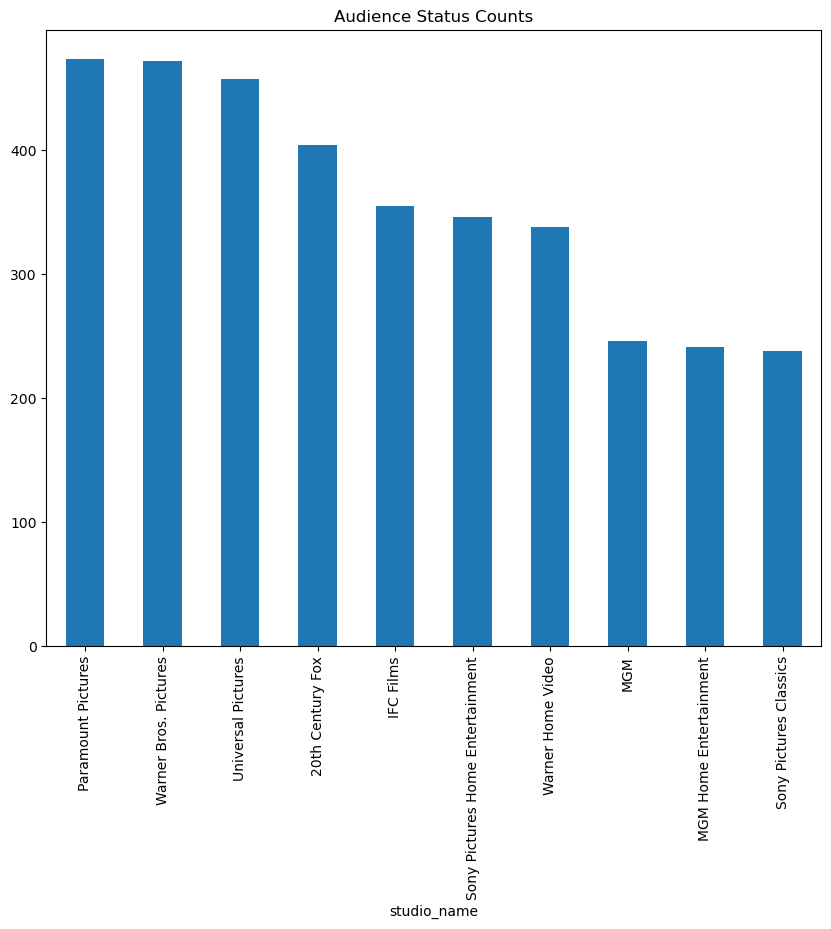

In [143]:
#Number of Movies Produced by top 10 studio name
print(df['studio_name'].value_counts()[:10])
plt.figure(figsize=(10,8))
df['studio_name'].value_counts()[:10].plot(kind='bar')
plt.title('Audience Status Counts')

In [55]:
#Movies per Year
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], dayfirst=True, errors='coerce')

# Extract the year from the datetime
df['in_theaters_year'] = df['in_theaters_date'].dt.year

# Display the result
print(df[['in_theaters_date', 'in_theaters_year']])

      in_theaters_date  in_theaters_year
0           2010-02-12              2010
1           2010-04-30              2010
2           1979-10-05              1979
3           1957-04-13              1957
4           1954-01-01              1954
...                ...               ...
16632       2006-08-11              2006
16633       1981-10-02              1981
16634       2016-03-04              2016
16636       1964-06-17              1964
16637       1979-12-14              1979

[14090 rows x 2 columns]


Year with most number of movies:  2014
Year with least number of movies:  1914


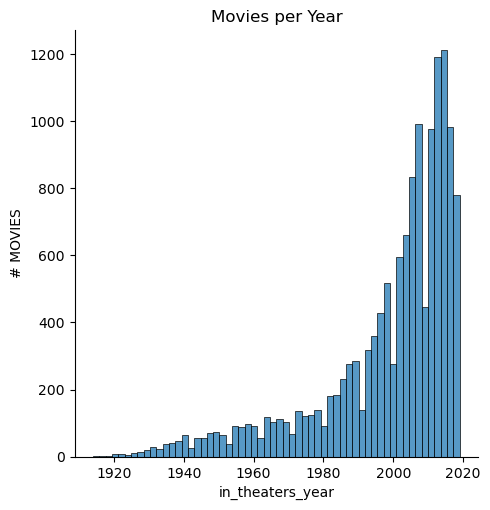

In [57]:
sns.displot(data=df, x='in_theaters_year')
plt.ylabel('# MOVIES')
plt.title('Movies per Year')
print('Year with most number of movies: ', df['in_theaters_year'].value_counts().index[0])
print('Year with least number of movies: ', df['in_theaters_year'].value_counts().index[-1])

Text(0, 0.5, 'Counts')

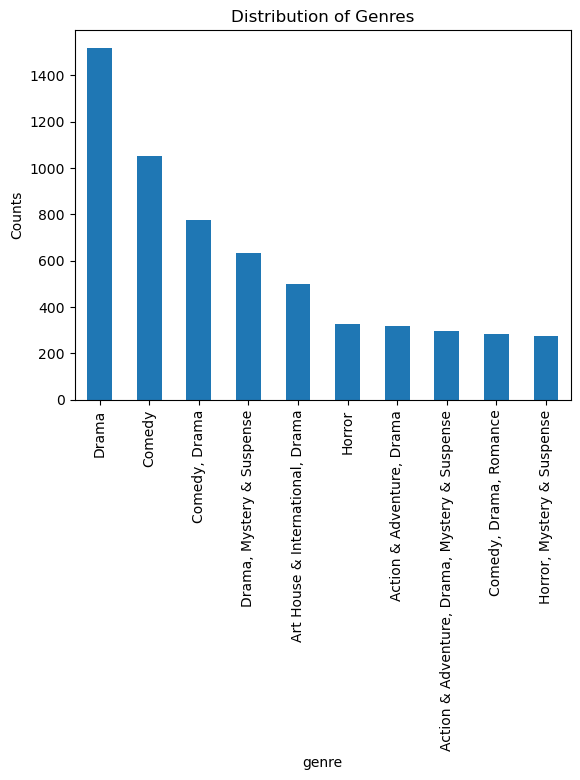

In [163]:
df['genre'].value_counts()[:10].plot(kind='bar')
plt.title('Distribution of Genres')
plt.ylabel('Counts')

## Correlation

<Axes: >

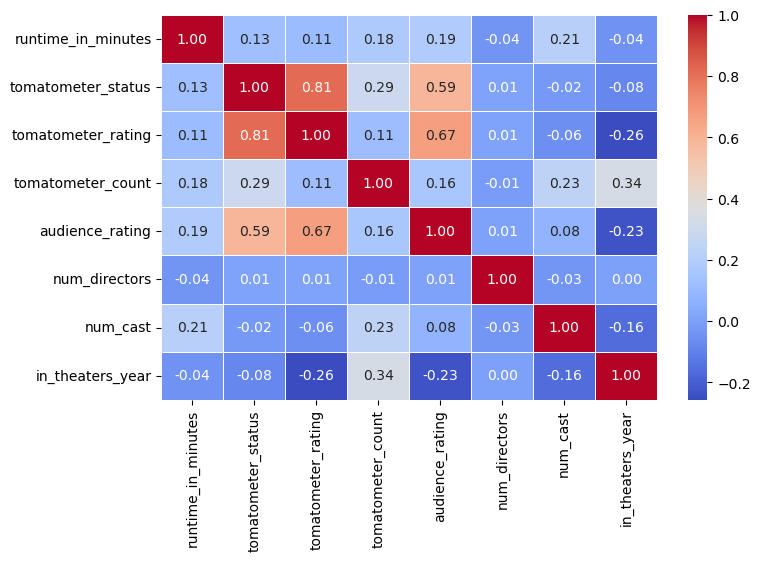

In [60]:
#Correlation
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)

### correlation analysis:

1)Critic ratings strongly correlate with "Certified Fresh" status, indicating significant critic influence.

2)Moderate agreement exists between critic and audience ratings.

3)Review counts increase with release year, likely due to online review accessibility.

In [62]:
#Correlation with the target value 'tomatometer_status'
df.select_dtypes('number').corr()['tomatometer_status'].sort_values(ascending=False)

tomatometer_status    1.000000
tomatometer_rating    0.813962
audience_rating       0.590790
tomatometer_count     0.290916
runtime_in_minutes    0.126127
num_directors         0.011629
num_cast             -0.022036
in_theaters_year     -0.083762
Name: tomatometer_status, dtype: float64

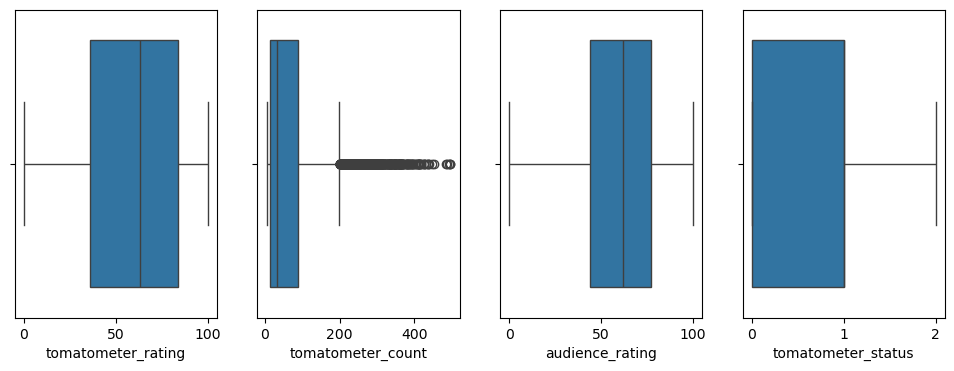

In [64]:
#Columns with high correlation
#Checking for OUTLIERS
box_col = ['tomatometer_rating', 'tomatometer_count', 'audience_rating','tomatometer_status']
fig, ax = plt.subplots(1,4, figsize=(12, 4))
ax = ax.flatten()
for index, value in enumerate(box_col):
    sns.boxplot(data=df, x=value, ax=ax[index])

### INFERANCE

1)Critic ratings are more centered around 50, with fewer extreme values compared to audience ratings.

2)Audience ratings exhibit greater variability with more outliers.

3)Review counts vary significantly, with some movies having many more reviews than others.

4)The distribution of critic ratings appears relatively symmetrical.

5)Understanding the relationship between critic and audience ratings requires further analysis.
   

# Removing Outliers  Using IQR Method

In [65]:
df1 = df['tomatometer_count'] < iqr(df['tomatometer_count']) * 1.5 + np.percentile(df['tomatometer_count'], 75)

In [67]:
df=df[df1]

In [66]:
df.shape

(14090, 18)

In [68]:
target = df['tomatometer_status'].copy()
df.drop('tomatometer_status', axis=1, inplace=True)

In [70]:
hist_col = df.select_dtypes('number').columns
hist_col.shape

(7,)

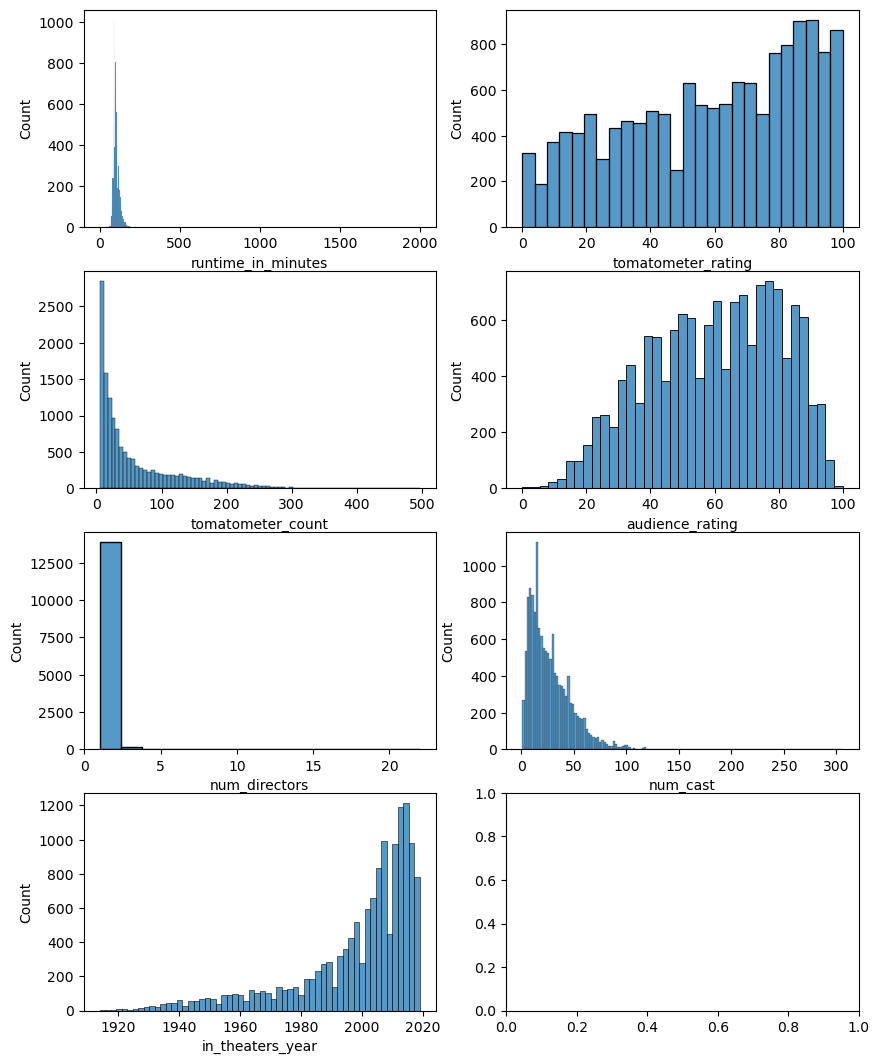

In [72]:
fig, ax = plt.subplots(4, 2, figsize=(10,13))
ax = ax.flatten()
for index, value in enumerate(hist_col):
    sns.histplot(data=df, x=value, ax=ax[index])

### check Skewness

In [74]:
#Check Skewness
df.skew(numeric_only=True)

runtime_in_minutes    30.151527
tomatometer_rating    -0.356320
tomatometer_count      1.852693
audience_rating       -0.282564
num_directors         12.424262
num_cast               1.643394
in_theaters_year      -1.527447
dtype: float64

In [76]:
#Data is considered skewed if skewness is >= 1 or <= -1
skewness_ckeck = (df.skew(numeric_only=True) >= 1) | (df.skew(numeric_only=True) <= -1)
skewed_columns = skewness_ckeck[skewness_ckeck == True].index
skewed_columns

Index(['runtime_in_minutes', 'tomatometer_count', 'num_directors', 'num_cast',
       'in_theaters_year'],
      dtype='object')

In [78]:
np.seterr(divide = 'ignore')
sk_ = pd.DataFrame(np.select([df[skewed_columns]==0, df[skewed_columns] > 0, df[skewed_columns] < 0], [0, np.log(df[skewed_columns]), np.log(df[skewed_columns])]),columns=skewed_columns).set_index(df.index)
df_skew = df.drop(columns=skewed_columns).set_index(df.index)
df_skew = pd.concat([df_skew,sk_],axis=1)
df_skew = df_skew[df.columns.tolist()]
df_skew.head()

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_cast,in_theaters_year
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,29-06-2010,4.418841,20th Century Fox,49,4.969813,53.0,0.0,4.465908,7.605890
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,19-10-2010,4.499810,Sony Pictures Classics,86,4.941642,64.0,0.0,2.079442,7.605890
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,27-08-1997,4.770685,Waner Bros.,68,3.091042,53.0,0.0,3.828641,7.590347
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,06-03-2001,4.553877,Criterion Collection,100,3.931826,97.0,0.0,2.772589,7.579168
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,20-05-2003,4.844187,Disney,89,3.295837,74.0,0.0,2.772589,7.577634


### Encoding

In [80]:
#Encoding content_rating column
rating = pd.get_dummies(df_skew['rating']).astype(int)
rating	

,G,NC17,NR,PG,PG-13,PG-13),R,R)
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
16632,0,0,0,1,0,0,0,0
16633,0,0,0,0,0,0,1,0
16634,0,0,0,1,0,0,0,0
16636,0,0,0,1,0,0,0,0


In [84]:
df_feature = pd.concat([df_skew[['tomatometer_rating','tomatometer_count','runtime_in_minutes','num_directors','num_cast','in_theaters_year']],rating], axis=1)

In [86]:
df_feature.head()

,tomatometer_rating,tomatometer_count,runtime_in_minutes,num_directors,num_cast,in_theaters_year,G,NC17,NR,PG,PG-13,PG-13),R,R)
0,49,4.969813,4.418841,0.0,4.465908,7.605890,0,0,0,1,0,0,0,0
1,86,4.941642,4.499810,0.0,2.079442,7.605890,0,0,0,0,0,0,1,0
2,68,3.091042,4.770685,0.0,3.828641,7.590347,0,0,0,0,0,0,1,0
3,100,3.931826,4.553877,0.0,2.772589,7.579168,0,0,1,0,0,0,0,0
4,89,3.295837,4.844187,0.0,2.772589,7.577634,1,0,0,0,0,0,0,0


In [88]:
scaler = StandardScaler()
df_feature_scale = scaler.fit_transform(df_feature)
df_feature_scale

array([[-0.34713657,  1.27889453, -0.9220262 , ..., -0.01459323,
        -0.8181878 , -0.00842481],
       [ 0.94984272,  1.25375636, -0.55263   , ..., -0.01459323,
         1.22221328, -0.00842481],
       [ 0.31887982, -0.39761868,  0.68315283, ..., -0.01459323,
         1.22221328, -0.00842481],
       ...,
       [ 1.33543116,  1.86909066,  0.27915546, ..., -0.01459323,
        -0.8181878 , -0.00842481],
       [ 1.26532417, -0.43913062,  1.43039067, ..., -0.01459323,
        -0.8181878 , -0.00842481],
       [-0.06670862, -1.41947264,  0.64432545, ..., -0.01459323,
        -0.8181878 , -0.00842481]])

### Splitting the data into train set and test set

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_scale, target, test_size=0.2, random_state=42)

In [92]:
X_train.shape

(11272, 14)

In [94]:
y_train.shape

(11272,)

# Decision Tree Model

In [96]:
model = DecisionTreeClassifier(random_state=2)

In [98]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

## Model predict

In [100]:
y_predict = model.predict(X_test)

In [102]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9879347054648687
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       0.98      0.98      0.98       974
           2       0.97      0.97      0.97       518

    accuracy                           0.99      2818
   macro avg       0.98      0.98      0.98      2818
weighted avg       0.99      0.99      0.99      2818



[Text(0.27076099537037035, 0.9761904761904762, 'x[0] <= 0.021\ngini = 0.63\nsamples = 11272\nvalue = [5142.0, 3995.0, 2135.0]'),
 Text(0.2615017361111111, 0.9285714285714286, 'gini = 0.0\nsamples = 5142\nvalue = [5142, 0, 0]'),
 Text(0.28002025462962965, 0.9285714285714286, 'x[1] <= 0.125\ngini = 0.454\nsamples = 6130\nvalue = [0.0, 3995.0, 2135.0]'),
 Text(0.05092592592592592, 0.8809523809523809, 'x[1] <= 0.102\ngini = 0.002\nsamples = 3254\nvalue = [0, 3251, 3]'),
 Text(0.018518518518518517, 0.8333333333333334, 'x[1] <= -0.106\ngini = 0.001\nsamples = 3219\nvalue = [0, 3218, 1]'),
 Text(0.009259259259259259, 0.7857142857142857, 'gini = 0.0\nsamples = 2774\nvalue = [0, 2774, 0]'),
 Text(0.027777777777777776, 0.7857142857142857, 'x[1] <= -0.077\ngini = 0.004\nsamples = 445\nvalue = [0, 444, 1]'),
 Text(0.018518518518518517, 0.7380952380952381, 'x[2] <= 0.585\ngini = 0.03\nsamples = 65\nvalue = [0, 64, 1]'),
 Text(0.009259259259259259, 0.6904761904761905, 'gini = 0.0\nsamples = 50\nvalu

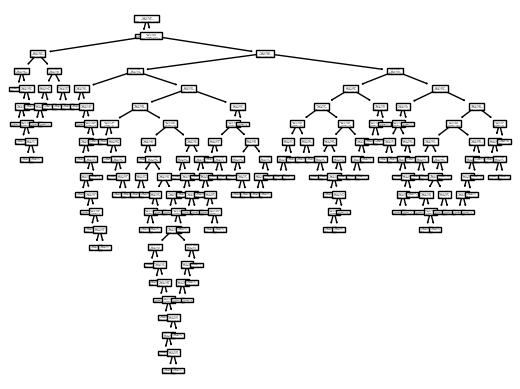

In [104]:
plot_tree(model)

[[1326    0    0]
 [   0  957   17]
 [   0   17  501]]


Text(50.722222222222214, 0.5, 'ACTUAL')

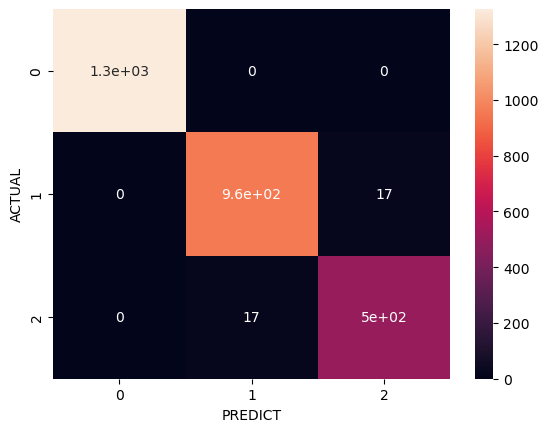

In [106]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

# Random Forest Model

In [109]:
#Using default parameters
random_forest = RandomForestClassifier(random_state=2)

In [111]:
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

In [113]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9904187366926899
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       0.98      0.99      0.99       974
           2       0.98      0.96      0.97       518

    accuracy                           0.99      2818
   macro avg       0.99      0.99      0.99      2818
weighted avg       0.99      0.99      0.99      2818



[[1326    0    0]
 [   0  966    8]
 [   0   19  499]]


Text(50.722222222222214, 0.5, 'ACTUAL')

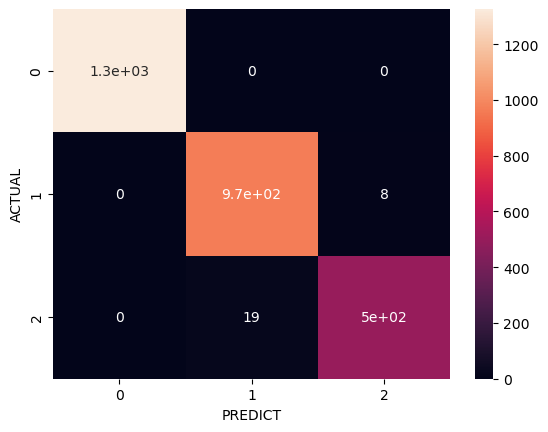

In [115]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')


ftomatometer_rating: 0.7003684113150336
ftomatometer_count: 0.18506228733723423
fruntime_in_minutes: 0.01920282959677413
fnum_directors: 0.001925906498874672
fnum_cast: 0.0164940182271998
fin_theaters_year: 0.04444616183959683
fG: 0.0014878551061080617
fNC17: 0.00011735623415218591
fNR: 0.019645421802259866
fPG: 0.0012589790518468488
fPG-13: 0.005143671679070697
fPG-13): 9.941132188834064e-06
fR: 0.004798025817647221
fR): 3.91343620129274e-05


([<matplotlib.axis.YTick at 0x220f1749f10>,
 [Text(0, 0, 'tomatometer_rating'),
  Text(0, 1, 'tomatometer_count'),
  Text(0, 2, 'runtime_in_minutes'),
  Text(0, 3, 'num_directors'),
  Text(0, 4, 'num_cast'),
  Text(0, 5, 'in_theaters_year'),
  Text(0, 6, 'G'),
  Text(0, 7, 'NC17'),
  Text(0, 8, 'NR'),
  Text(0, 9, 'PG'),
  Text(0, 10, 'PG-13'),
  Text(0, 11, 'PG-13)'),
  Text(0, 12, 'R'),
  Text(0, 13, 'R)')])

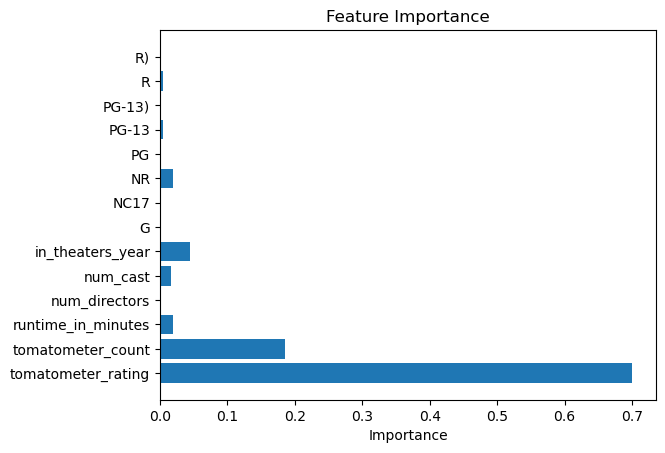

In [117]:
feature_importances = random_forest.feature_importances_
for index, feature in enumerate(df_feature.columns):
    print(f'f{feature}: {feature_importances[index]}')

plt.barh(np.arange(len(feature_importances)), feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.yticks(np.arange(len(feature_importances)), df_feature.columns)

### INFERACNE

       The analysis reveals that Rotten Tomatoes rating and the number of reviews contributing to it are the most significant predictors of the outcome. This suggests that the model heavily relies on critics' opinions to make predictions, potentially overlooking other factors like star power or release date. Features like runtime, number of directors, and cast size have limited influence. Understanding the specific outcome variable and the type of model used would provide further insights into the interpretation of these findings.

In [123]:
scaler = StandardScaler()
df_feature_scale = scaler.fit_transform(df_feature.drop(['R','R)','PG-13)','PG-13', 'PG', 'NR', 'NC17', 'G', 'num_cast','num_directors','runtime_in_minutes'], axis=1))
df_feature_scale


array([[-0.34713657,  1.27889453,  0.579423  ],
       [ 0.94984272,  1.25375636,  0.579423  ],
       [ 0.31887982, -0.39761868, -0.98246609],
       ...,
       [ 1.33543116,  1.86909066,  0.87894007],
       [ 1.26532417, -0.43913062, -1.74702397],
       [-0.06670862, -1.41947264, -0.98246609]])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_scale, target, test_size=0.2, random_state=42)
print(f'Size of train data: {X_train.shape[0]}\nSize of test data: {X_test.shape[0]}')

Size of train data: 11272
Size of test data: 2818


In [127]:
random_forest = RandomForestClassifier(random_state=2)

In [129]:
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

In [131]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9900638750887154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       0.98      0.99      0.99       974
           2       0.97      0.97      0.97       518

    accuracy                           0.99      2818
   macro avg       0.99      0.99      0.99      2818
weighted avg       0.99      0.99      0.99      2818



[[1326    0    0]
 [   0  961   13]
 [   0   15  503]]


Text(50.722222222222214, 0.5, 'ACTUAL')

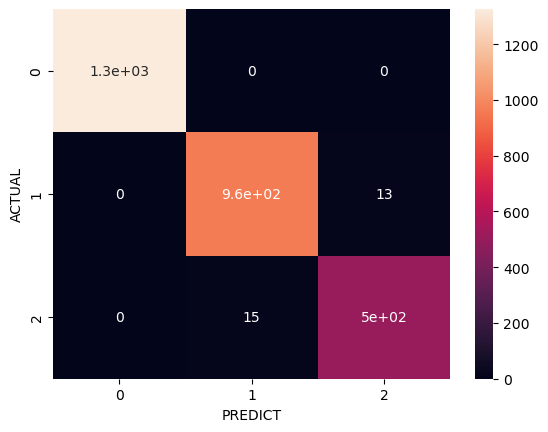

In [133]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

In [135]:
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(target), y=target.values)
class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7261389404246547, 1: 0.9451935332394177, 2: 1.7703229048875486}

In [139]:
random_forest_weighted = RandomForestClassifier(random_state=2)

In [141]:
random_forest_weighted.fit(X_train, y_train)
y_predict = random_forest_weighted.predict(X_test)

In [143]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9900638750887154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       0.98      0.99      0.99       974
           2       0.97      0.97      0.97       518

    accuracy                           0.99      2818
   macro avg       0.99      0.99      0.99      2818
weighted avg       0.99      0.99      0.99      2818



[[1326    0    0]
 [   0  961   13]
 [   0   15  503]]


Text(50.722222222222214, 0.5, 'ACTUAL')

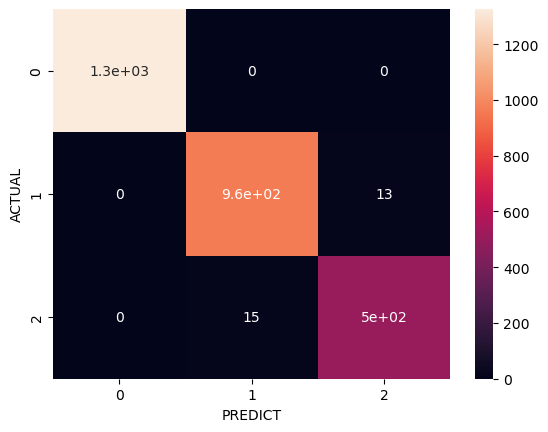

In [145]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

# XGBoot Model

In [148]:
clf = XGBClassifier(max_depth=5,
                    objective='multi:softprob',
                    n_estimators=1000, 
                        num_classes=3
                    )

In [150]:
clf.fit(X_train, y_train)  
y_predict = clf.predict(X_test)

C:\Users\Ezhilarasi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


In [152]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9897090134847409
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       0.99      0.98      0.99       974
           2       0.97      0.97      0.97       518

    accuracy                           0.99      2818
   macro avg       0.99      0.99      0.99      2818
weighted avg       0.99      0.99      0.99      2818



##### Overall Accuracy:
The model achieved an accuracy of 0.99 (98.97%), which indicates that it correctly classified 98.97% of all samples in the dataset.

#### Conclusion:
The model is highly effective with near-perfect classification performance. However, there might be slight room for improvement in recall for Class 1 and Class 2. Depending on the application, this level of performance might already be sufficient. If further improvement is needed, consider techniques like fine-tuning hyperparameters, handling class imbalance, or enhancing feature engineering.

[[1326    0    0]
 [   0  959   15]
 [   0   14  504]]


Text(50.722222222222214, 0.5, 'ACTUAL')

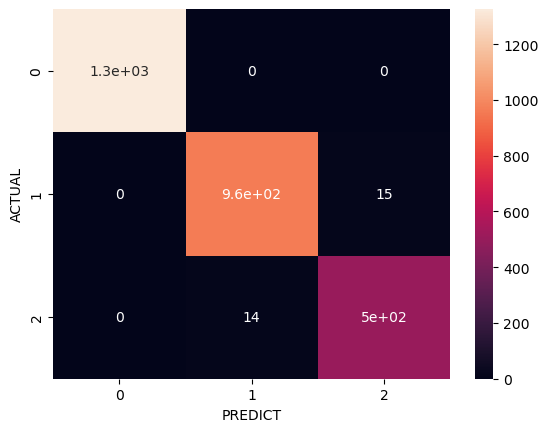

In [154]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

### INFERANCE;

    1. Class 0 has 1326 true positives with no misclassifications.


    2. Class 1 has 959 true positives but 15 misclassified as class 2.


    3. Class 2 has 504 true positives with 14 misclassified as class 1.


    4. Overall, the model demonstrates high accuracy with minimal errors across all classes.